!conda install pydotplus -y
!conda install graphviz -y

In [1]:
#importing necessary packages
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

C:\Users\UNION\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [3]:
data = pd.read_csv('iris.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
X = data.iloc[:,:-1]
y = data.target
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [33]:
#Defining and fitting
model = DecisionTreeClassifier(max_depth=1, random_state=15)
model.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=15, splitter='best')

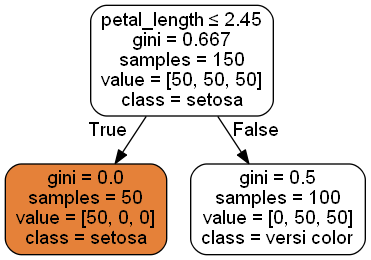

In [34]:
#Visualizing
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, 
                feature_names = X.columns,
                class_names=['setosa','versi color','virginca'],
                rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [9]:
print(data.petal_length.min())
print(data.petal_length.max())

1.0
6.9


In [23]:
# counting no. of data in a column group by other column
from collections import Counter
Counter(data.loc[data.petal_length<5.0,'target'])

Counter({0: 50, 1: 48, 2: 6})

In [24]:
1 - ((50/104)**2+(48/104)**2+(6/104)**2)

0.5525147928994083

In [25]:
1 - ((0/46)**2+(2/46)**2+(44/46)**2)

0.08317580340264641